In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [32]:
# dy/dt = func(t,y)
# y = [q,p]   
# Hamiltonian system H(q,p) = p^2/2 + V(q,parms)
# V(q) is potential 
# Vprime(q,parms) is dV/dq(q,parms)
def func(t,y,parms):
    q = y[0]
    p = y[1]
    dydt = np.array([p,-Vprime(q,parms)])
    return dydt

# dull Harmonic oscillator!  dH/dq = dV/dq = q
def Vprime(q,parms):
    return q

# two-stage second-order Runge–Kutta method known as Ralston method
# integrate a single step of duration dt
# the function func() returns dy/dt and uses parameters parms
def runge_s2(func,t,y,dt,parms):
    dt23 = 2.0*dt/3.0 # 2/3rd of a step
    #print(dt23)
    k1 = func(t,y,parms)  # returns dy/dt
    #print(k1)
    k2 = func(t + dt23,y + dt23*k1,parms)
    ynew = y + dt*(k1/4. + k2*3./4.)
    return ynew    # return new value of y at end of timestep 

# second order leapfrog method for a Hamiltonian system y = [q,p]
def leap_frog(func,t,y,dt,parms):
    q_n = y[0]
    p_n = y[1]
    qhalf = q_n + p_n*dt/2  # half step of drift 
    yhalf = np.array([qhalf,p_n])  # evalulate dydt at half step
    dydt_half = func(t,yhalf,parms)
    pn1 = p_n +  dydt_half[1]*dt  # full step of kick
    qn1 = qhalf + pn1*dt/2   # another half step of kick 
    ynew = np.array([qn1,pn1])
    return ynew  # return new value of y at end of timestep 

# integrate nn steps 
# initial condition is y0 at time t0
# parms is passed to function func
# func returns dy/dt
# i_type determine which integrator is called
# returned are arrays of q,p,t values
def nsteps(func,y0,t0,dt,nn,parms,i_type):
    qarr = []  #allocate some arrays
    parr = []
    tarr = []
    y = y0  # set initial condition 
    t = t0
    qarr = np.append(qarr,y[0])  # store initial condition 
    parr = np.append(parr,y[1])
    tarr = np.append(tarr,t)
    for i in range(nn):
        if (i_type == 'rungeKutta'):
            ynew = runge_s2(func,t,y,dt,parms)  # integrate with runge kutte second order
        else:
            ynew = leap_frog(func,t,y,dt,parms)  # integrate with leapfrog integrator
        y = ynew 
        t += dt
        qarr = np.append(qarr,y[0])  # append integrated values to arrays
        parr = np.append(parr,y[1])
        tarr = np.append(tarr,t)
        
    return qarr,parr,tarr # return arrays 

<IPython.core.display.Javascript object>


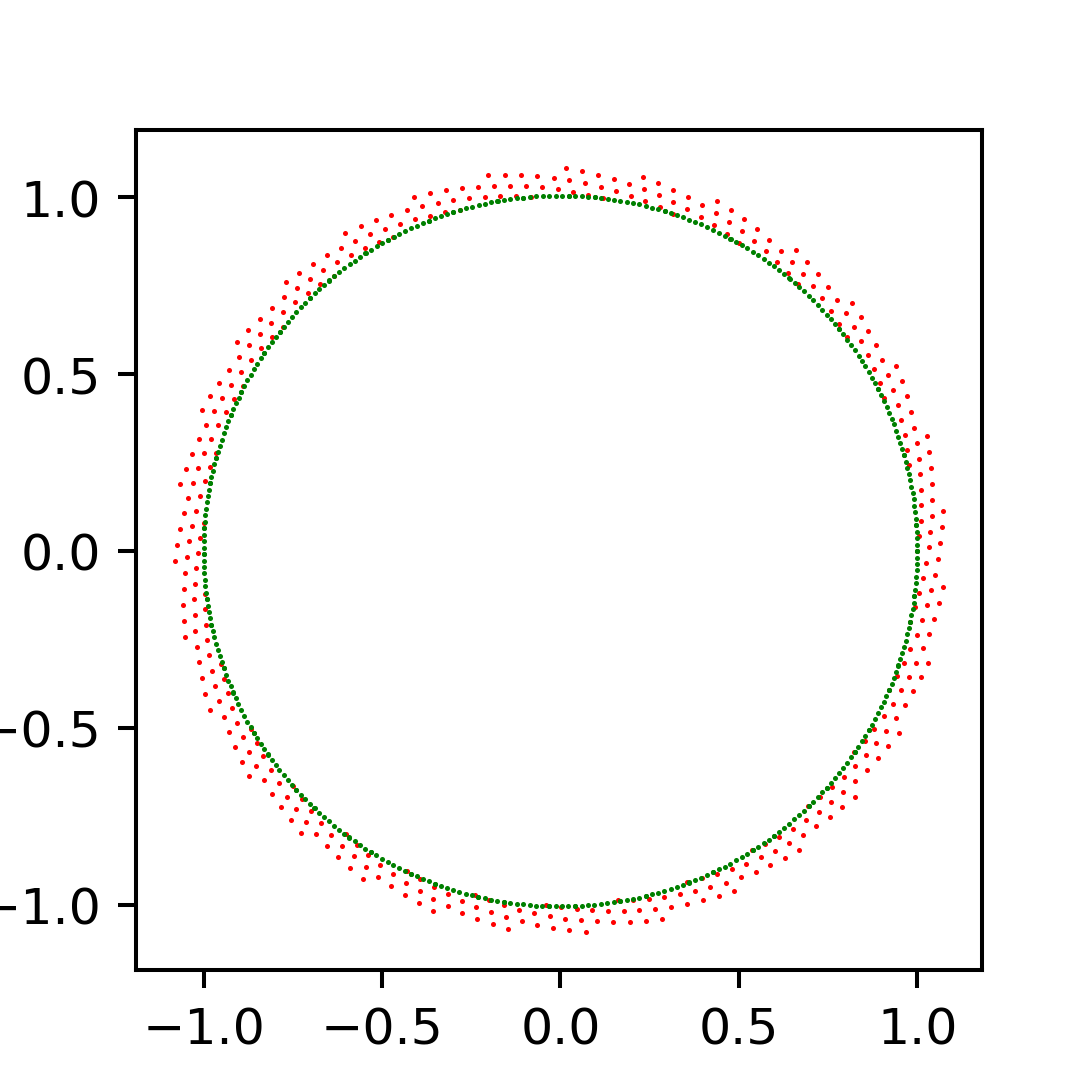

In [48]:
y0 = np.array([1,0])
dt  = 0.2
parms = []
t0=0; nn = 400; 
i_type_a = 'rungeKutta'
qarr_a,parr_a,tarr_a  = nsteps(func,y0,t0,dt,nn,parms,i_type_a)  # integrate with Runge Kutta 
Earr_a = 0.5*(parr_a**2 + qarr_a**2) # compute energy 
Earr_a -= Earr_a[0]  # look at energy difference 
i_type_b = 'leap_frog'
qarr_b,parr_b,tarr_b  = nsteps(func,y0,t0,dt,nn,parms,i_type_b)  #integrate with leapfrog
Earr_b = 0.5*(parr_b**2 + qarr_b**2)
Earr_b -= Earr_b[0]

fig, ax = plt.subplots(1,1,figsize=(3,3),dpi=200)
ax.plot(qarr_a,parr_a,'r.',markeredgecolor='none',ms=2)
ax.plot(qarr_b,parr_b,'g.',markeredgecolor='none',ms=2)